# Daten und Bibliotheken importieren

<div class="panel panel-success">
    <div class="panel-heading">
        <b> Info zum Datensatz</b>
    </div>
    <div class="panel-body">

In diesem Notebook soll mit Hilfe der JIM-PB Daten ein Entscheidungsbaum erstellt werden, der anhand einiger persönlicher Daten vorhersagen kann, ob eine Person häufig oder selten Onlinespiele spielt.
        
Dafür werden zunächst die Daten und einige Python Bibliotheken eingelesen.

In [14]:
# eine für diaktische Zwecke erstellte Bibliothek für das Estellen von Entscheidungsbäumen
from PyTree import ClassificationTree as ct

#Bibliotheken für die Datenverarbeitung
import pandas as pd
import numpy as np

#Bilbiotheken für die Datenvisualisierung
import plotly as py
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()

In [54]:
#Einlesen einer Datenstichprobe aus dem sogenannten JIM-PB Datensatz
df_jim_bin = pd.read_csv('Daten/Training/jim_binaer.csv', sep = ';')

df_jim_bin

,Spielen_OnlineSpiele,Geschlecht,Nutzen_Twitter,Nutzen_Snapchat,Nutzen_Instagram,Youtube_Musikvideos,Youtube_LetsPlay,Youtube_LustigeClips,Youtube_Sportvideos,Youtube_ModeBeauty,Tablet_Besitz,Computer_Besitz,FesteKonsole_Besitz,Smartphone_Besitz,E_Reader_Besitz
0,Häufig,männlich,Selten,Häufig,Häufig,Häufig,Häufig,Häufig,Selten,Selten,False,False,True,True,False
1,Häufig,männlich,Selten,Selten,Häufig,Häufig,Häufig,Selten,Selten,Selten,True,False,True,True,False
2,Selten,weiblich,Selten,Selten,Häufig,Selten,Selten,Selten,Selten,Selten,False,False,False,True,False
3,Häufig,männlich,Selten,Selten,Selten,Häufig,Häufig,Selten,Selten,Selten,False,False,False,True,False
4,Häufig,männlich,Selten,Häufig,Häufig,Häufig,Häufig,Häufig,Häufig,Selten,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Häufig,männlich,Häufig,Selten,Häufig,Selten,Selten,Selten,Selten,Selten,True,True,True,True,False
146,Selten,weiblich,Selten,Selten,Selten,Häufig,Selten,Häufig,Selten,Selten,False,True,False,False,False
147,Häufig,männlich,Häufig,Häufig,Häufig,Häufig,Häufig,Selten,Selten,Selten,False,False,True,True,False
148,Häufig,männlich,Häufig,Häufig,Häufig,Häufig,Häufig,Häufig,Häufig,Selten,False,True,True,True,False


<div class="panel panel-success">
    <div class="panel-heading">
        <b> Info zum Datensatz</b>
    </div>
    <div class="panel-body">

Die JIM-PB Daten stammen aus einer Umfrage aus dem Jahr 2021 mit Jugendlichen an Paderborner Schulen. Es handelt sich um eine Umfrage zum Medienverhalten der Jugendlichen, die an den Fragenkatalog der JIM-Studie angelehnt ist. Neben Persönlichen Daten werden dabei beispielsweise der Zugang zu digitalen Geräten, das Youtube Nutzerverhalten und der Gebrauch sozialer Medien abgefragt.

Viele Variablen (z. B. Nutzen_Instagram) wurde mit einer siebenstufigen Skala abgefragt. Die Werte geben die Häufigkeit der Nutzung:

    7: täglich
    6: mehrmals pro Woche
    5: einmal pro Woche
    4: einmal in 14 Tagen
    3: einmal im Monat 
    2: seltener
    1: nie
        
Diese Werte wurden für den vorliegenden Datensatz aber noch binäre umcodiert, um den Datensatz zu vereinfachen:
    
    5-7: Häufig
    1-4: Selten

Eine weitere binäre Skala (z.B. bei Computer_Besitz) gibt einfach an, ob etwas zutrifft oder nicht.

    True: trifft zu
    False: trifft nicht zu

Die weiteren Skalen (z.B. für Alter, Geschlecht, ...) sind selbsterklärend.
       

# Daten visualisieren

In [23]:
#Ausgabe der Spaltenüberschriften, d. h. der abgefragten Merkmale
df_jim_bin.columns

Index(['Spielen_OnlineSpiele', 'Geschlecht', 'Nutzen_Twitter',
       'Nutzen_Snapchat', 'Nutzen_Instagram', 'Youtube_Musikvideos',
       'Youtube_LetsPlay', 'Youtube_LustigeClips', 'Youtube_Sportvideos',
       'Youtube_ModeBeauty', 'Tablet_Besitz', 'Computer_Besitz',
       'FesteKonsole_Besitz', 'Smartphone_Besitz', 'E_Reader_Besitz'],
      dtype='object')

<div class="panel panel-success">
    <div class="panel-heading">
        <b> Erklärung - Einfache Visualisierungen</b>
    </div>
    <div class="panel-body">

In diesem Abschnitt erhältst du die Möglichkeit einfache Visualsierungen für die Daten zu erstellen.
        
Du findest Befehle für:
        
* Ein **Histogramm**, dass die Häufigkeitsverteilung für ein Merkmal visualsiert 
        
        
* Eine **Kreuztabelle/ Kontingenztabelle**, die die absoluten Häufigkeiten von Kombinationen bestimmter Merkmalsausprägungen von zwei unterschiedlichen Merkmalen enthält.
        


## Histogramm

In [22]:
#Ein Histogramm erstellen, um die Häufigkeitsverteilung für ein Merkmal zu visualisieren
df_jim_bin['Spielen_OnlineSpiele'].iplot(kind='histogram')

<div class="panel panel-success">
    <div class="panel-heading">
        <b> Erklärung - Histogramm</b>
    </div>
    <div class="panel-body">

In diesem Histogramm sehen wir, dass **77 Personen** aus dem Datensatz **selten** und **73 Personen** **häufig** Onlinespiele spielen.
        
Die Merkmalsbezeichnung kann im Code einfach geändert werden, um eine andere Häufigkeitsverteilung zu visualisieren.

## Kreuztabelle

In [30]:
# Erstellen einer Kreuztabelle für zei Merkmale
pd.crosstab(df_jim_bin['Spielen_OnlineSpiele'], df_jim_bin['Computer_Besitz'])

Computer_Besitz,False,True
Spielen_OnlineSpiele,,
Häufig,33,40
Selten,57,20


<div class="panel panel-success">
    <div class="panel-heading">
        <b> Erklärung - Kreuztabelle</b>
    </div>
    <div class="panel-body">

In diese Kreuztabelle sehen wir z. B., dass von den 77 Personen, die selten Onlinespiele spielen 20 Personen einen Computer besitzen und 57 nicht. Unter den 73 Befragten die häufig Onlinespiele spielen sind die Mehrheitsverhältnisse anders. Von diesen Personen besitzen 40 einen Computer und 33 nicht.  
        
Die Merkmalsbezeichnungen können im Code einfach geändert werden, um eine andere Kreuztabelle zu visualisieren.

# Entscheidungsbaum manuell erstellen

## Entscheidungsbaum initialisieren

In [44]:
#Entscheidungsbaum initialisieren 
tree = ct.DecisionTree(data = df_jim_bin, target = 'Spielen_OnlineSpiele', crit = 'misclassification_error')

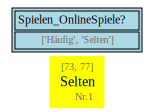

In [37]:
#Eintscheidungsbaum visualisieren
tree.print_tree()

<div class="panel panel-success">
    <div class="panel-heading">
        <b> Erklärung - Ein "leerer" Entscheidungsbaum</b>
    </div>
    <div class="panel-body">
        
Der Entscheidungsbaum wird initialisiert, indem ein Datenatz (data), eine Zielvariable (target) und ein Entscheidungskriterium (crit) für das Auswählen von Entscheidungsregeln übergeben werden. 
        
Der Entscheidungsbaum enthält noch keine Entscheidungsregeln und daher wird nur ein Knoten (gelb) angezeigt, der die Häufigkeitsverteilung der Zielvariable im gesamten Datensatz anzeigt und damit eine Mehrheitsentscheidung (Selten) trifft.
        
Blau hinterlegt werden die Zielvariable und ihre möglichen Ausprägungen angezeigt.

## Entscheidungsregel manuell hinzufügen

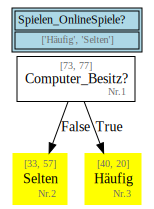

In [38]:
#einen Datensplit mit selbst gewähltem Merkmal
tree.manual_split(attribute = 'Computer_Besitz')

#Eintscheidungsbaum visualisieren
tree.print_tree()

<div class="panel panel-success">
    <div class="panel-heading">
        <b> Erklärung - Ein einstufiger Entscheidungsbaum</b>
    </div>
    <div class="panel-body">
        
Dem Entscheidungsbaum wird mit der Methode manual_split() eine Entscheidungsregel hinzugefügt, indem mit der übergebenen Variable (Computer_Besitz) ein Datensplit durchgeführt wird. Der Datensatz wird somit in die Computerbesitzer (True) und die nicht-Computerbesitzer (False) aufgeteilt. In beiden Gruppen wird eine Mehrheitsentscheidung getroffen.
        
Die resultierende Entscheidungsregel besagt: Computerbesitzer spielen häufig Onlinespiele und nicht-Computerbesitzer spielen selten Onlinespiele.
        
        
Durch die Regel werden 53 Fälle falsch und 97 Fälle korrekt zugeordnet. Das entspricht einer Rate von ca. 64.7 % korrekter Zuordnungen.

In [39]:
# Die Rate korrekter Klassifikationen und eine Confusion Matrix ausgeben 
tree.prediction_accuracy(df_jim_bin, conf_mat=True)

prediction,Häufig,Selten
correct,,
Häufig,40,33
Selten,20,57


0.6466666666666666

## Einen mehrstufigen Entscheidungsbaum erstellen

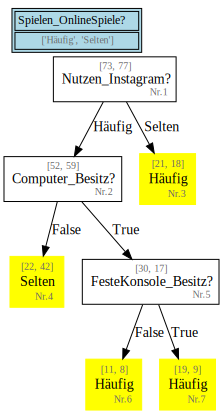

In [49]:
#Mehrstufigen Entscheidungsbaum ertellen 
tree.manual_split(attribute = 'Nutzen_Instagram')
tree.manual_split(attribute = 'Computer_Besitz', node_nr = 2)
tree.manual_split(attribute = 'FesteKonsole_Besitz', node_nr = 5)

#Eintscheidungsbaum visualisieren
tree.print_tree()

<div class="panel panel-success">
    <div class="panel-heading">
        <b> Erklärung - Ein mehrstufiger Entscheidungsbaum</b>
    </div>
    <div class="panel-body">

Dies ist ein mehrstufiger Entscheidungsbaum der Tiefe 3. D.h. es sind maximal 3 Entscheidungsregeln in einem Pfad des Baums.       
       
Für einen mehrstufigen Entscheidungsbaum können mit dem gleichen Befehl manual_split() immer weitere Entscheidungsregeln hinzugefügt werden, indem eine Variable und eine Knotennummer (node_nr) übergeben werden. Die Knotennummer gibt an, an welcher Stelle die neue Entscheidungsregel angefügt wird.
        
Die Knotennummer steht auf jedem Knoten unten rechts.

<div class="panel panel-info">
    <div class="panel-heading">
        <b>Aufgabe</b>
    </div>
    <div class="panel-body">

Erstelle manuell einen mehrstufigen Entscheidungsbaum, der mindestens 80 % der Fälle korrekt klassifiziert und maximal die Tiefe 3 hat.

In [ ]:
# Hier ist PLatz für deinen Code

In [48]:
# Die Rate korrekter Klassifikationen und eine Confusion Matrix ausgeben 
tree.prediction_accuracy(df_jim_bin, conf_mat=True)

prediction,Häufig,Selten
correct,,
Häufig,51,22
Selten,35,42


0.62

# Entscheidungsbaum trainieren

## Entscheidungsregel automatisch suchen lassen

In [45]:
tree.manual_split(attribute = 'auto', doc=True)

,Attribute,Threshold,Criterion
0,Youtube_LetsPlay,None,0.262
1,Geschlecht,None,0.213
2,Computer_Besitz,None,0.133
3,FesteKonsole_Besitz,None,0.120
4,Youtube_LustigeClips,None,0.095
5,Nutzen_Snapchat,None,0.073
6,Youtube_ModeBeauty,None,0.071
7,Nutzen_Twitter,None,0.067
8,Youtube_Sportvideos,None,0.053
9,Youtube_Musikvideos,None,0.041


## Einen ganzen Entscheidungsbaum automatisch erstellen lassen

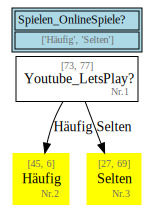

In [58]:
#Entscheidungsbaum initialisieren 
tree2 = ct.DecisionTree(data = df_jim_bin, target = 'Spielen_OnlineSpiele', crit = 'misclassification_error')

#Entscheidungsbaum automnatisiert erstellen 
tree2.grow_tree(max_depth = 1)

#Entscheidungsbaum visualisieren
tree2.print_tree()

<div class="panel panel-success">
    <div class="panel-heading">
        <b> Erklärung - Entscheidungsbaum automatisch erstellen</b>
    </div>
    <div class="panel-body">

Um einen Entscheidungsbaum automatisiert zu erstellen kann der Befehl grow_tree() genutzt werden. Dabei kann eine maximale Tiefe (max_depth) für den Entscheidungsbaum übergeben werden. Wenn keine maximale Tiefe angegeben wird, bricht der Prozess erst ab, wenn alle Fälle des Trainingsdatensatzes korrekt klassifiziert werden, oder keine Variablen mehr für weitere Entscheidungsregeln übrig sind.

In [59]:
tree2.prediction_accuracy(df_jim_bin, conf_mat=True)

prediction,Häufig,Selten
correct,,
Häufig,45,28
Selten,6,71


0.7733333333333333

## Testdaten

<div class="panel panel-success">
    <div class="panel-heading">
        <b> Erklärung - Entscheidungsbaum automatisch erstellen</b>
    </div>
    <div class="panel-body">

Um einen Entscheidungsbaum richtig bewerten zu können müssen neue Daten, sogenannte Testdaten, herangezogen werden.

In [62]:
df_jim_bin_test = pd.read_csv('Daten/Test/jim_binaer.csv', sep = ';')

df_jim_bin_test

In [61]:
tree2.prediction_accuracy(df_jim_bin_test, conf_mat=True)

prediction,Häufig,Selten
correct,,
Häufig,25,14
Selten,4,38


0.7777777777777778

<div class="panel panel-info">
    <div class="panel-heading">
        <b>Aufgabe</b>
    </div>
    <div class="panel-body">

Erstelle nach und nach automatisch Entscheidungsbäume der Tiefe 1, 2, 3, usw. bis zur Tiefe 10. Dokumentiere dabei für jede Stufe jeweils die Rate der korrekten Klassifikationen für die Trainings- und die Testdaten.
        
Fertige (gerne handschriftlich) eine Koordinatensystem an, in dem du auf der X-Achse die Tiefe des Baums und auf der Y-Achse die Rate der korrekten Klassifikationen abträgst. Zeichne für Trainings- und für Testdaten jeweils den Verlauf der korrekten Klassifikationen bei zunehmender Tiefe ein.
        
Was ist zu beobachten?
        
Wie erklärst du dir deine Beobachtung?

<div class="panel panel-info">
    <div class="panel-heading">
        <b>Optionale Aufgabe</b>
    </div>
    <div class="panel-body">

Wenn du noch Zeit übrig hast, kanst du dir eine der folgenden Aktivitäten aussuchen
        
1. Suche den Baum der am besten für Testdaten funktioniert. Nutze dafür eine Kombination aus Pre-Pruning (maximale Tiefe begrenzen) und Post-Pruning (Später einzelne Knoten wieder abschneiden). Den Befehl für das Post Pruning findest du weiter unten.
        
2. Änderen den Datensatz auf jim_numerisch (s. u.) und exploriere was sich dadurch verändert.

In [64]:
# Den Entscheidungsbaum an einem Knoten abschneiden
tree.prune_node(2)
        

In [ ]:
#Alternativ kann auch ein anders aufbereiteter Datensatz genutzt werden, der nicht ausschlisßlich binär codierte Merkmale enthält
df_jim_num = pd.read_csv('Daten/Training/jim_numerisch.csv', sep = ';')